In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import HeatMap

In [50]:
data = pd.read_csv('../input/globalterrorismdb_0718dist.csv', encoding='iso-8859-1')

In [51]:
for i in data.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [52]:
data[['latitude','longitude']]

latitude   longitude
0       18.456792  -69.951164
1       19.371887  -99.086624
2       15.478598  120.599741
3       37.997490   23.762728
4       33.580412  130.396361
5       37.005105  -89.176269
6      -34.891151  -56.187214
7       37.791927 -122.225906
8       43.076592  -89.412488
9       43.072950  -89.386694
10      43.468500  -89.744299
11      39.758968 -104.876305
12      41.890961   12.490069
13      42.331685  -83.047924
14      18.386932  -66.061127
15      52.501530   13.401851
16            NaN         NaN
17      40.697132  -73.931351
18      18.379998  -65.830948
19      47.610786 -122.331306
20      40.116748  -88.239270
21     -34.891151  -56.187214
22      47.610786 -122.331306
23      47.610786 -122.331306
24      40.717892  -74.067467
25      14.622869  -90.529068
26      14.674280  121.057495
27      10.482834  -66.962128
28      42.470310  -96.413949
29      33.606510  -88.650419
...           ...         ...
181661  17.001086   81.807490
181662   7.042777  126.449221
181663  11.831902   75.565432
181664  54.607712   -5.956210
181665  18.802725   81.497666
181666  11.492144   12.969724
181667  33.561504   36.368763
181668  35.560376   44.524705
181669  35.452110   44.375465
181670  33.816111   44.783524
181671  34.031331   44.070106
181672  33.966527   74.964225
181673  34.417122   70.449593
181674  36.045059   41.716717
181675   2.059819   45.326115
181676  34.217806   69.109316
181677   6.983953  124.420664
181678   7.053143  124.619270
181679  33.953167   44.921906
181680   3.810951   43.246506
181681   6.862806  124.443649
181682  42.888982   13.772795
181683  35.315467   64.815508
181684  25.180162   93.015788
181685  35.921051   64.774544
181686   2.359673   45.385034
181687  35.407278   35.942679
181688   6.900742  124.437908
181689  24.798346   93.940430
181690   7.209594  124.241966

[181691 rows x 2 columns]

In [53]:
countries = pd.DataFrame(data['country_txt'].value_counts()[:20])
print(countries)
countries['country'] = countries.index

                country_txt
Iraq                  24636
Pakistan              14368
Afghanistan           12731
India                 11960
Colombia               8306
Philippines            6908
Peru                   6096
El Salvador            5320
United Kingdom         5235
Turkey                 4292
Somalia                4142
Nigeria                3907
Thailand               3849
Yemen                  3347
Spain                  3249
Sri Lanka              3022
United States          2836
Algeria                2743
France                 2693
Egypt                  2479


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

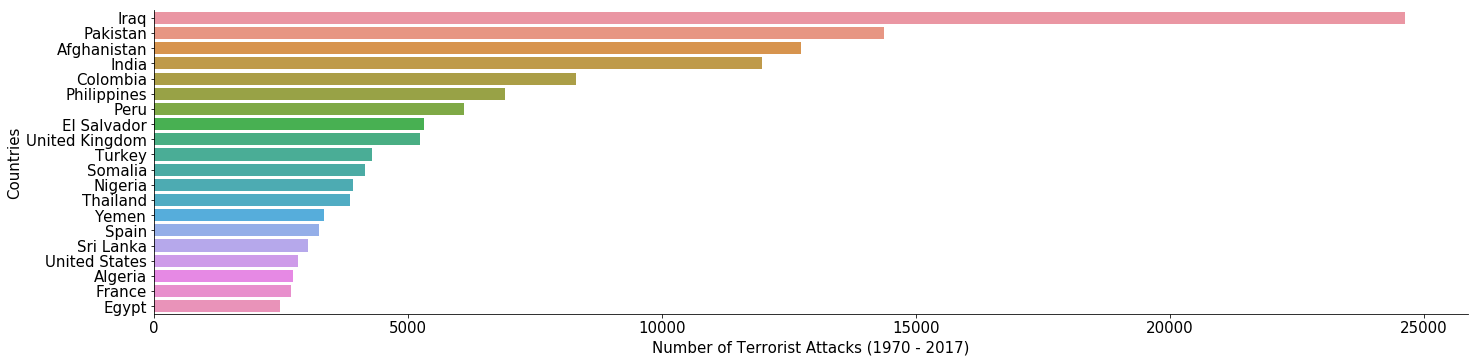

In [54]:
sns.catplot(x='country_txt', y='country', kind='bar', data=countries, aspect=4)
plt.xlabel('Number of Terrorist Attacks (1970 - 2017)', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [55]:
target = pd.DataFrame(data['targtype1_txt'].value_counts()[:20])
print(target)
target['targets'] = target.index

                                targtype1_txt
Private Citizens & Property             43511
Military                                27984
Police                                  24506
Government (General)                    21283
Business                                20669
Transportation                           6799
Utilities                                6023
Unknown                                  5898
Religious Figures/Institutions           4440
Educational Institution                  4322
Government (Diplomatic)                  3573
Terrorists/Non-State Militia             3039
Journalists & Media                      2948
Violent Political Party                  1866
Airports & Aircraft                      1343
Telecommunication                        1009
NGO                                       970
Tourists                                  440
Maritime                                  351
Food or Water Supply                      317


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

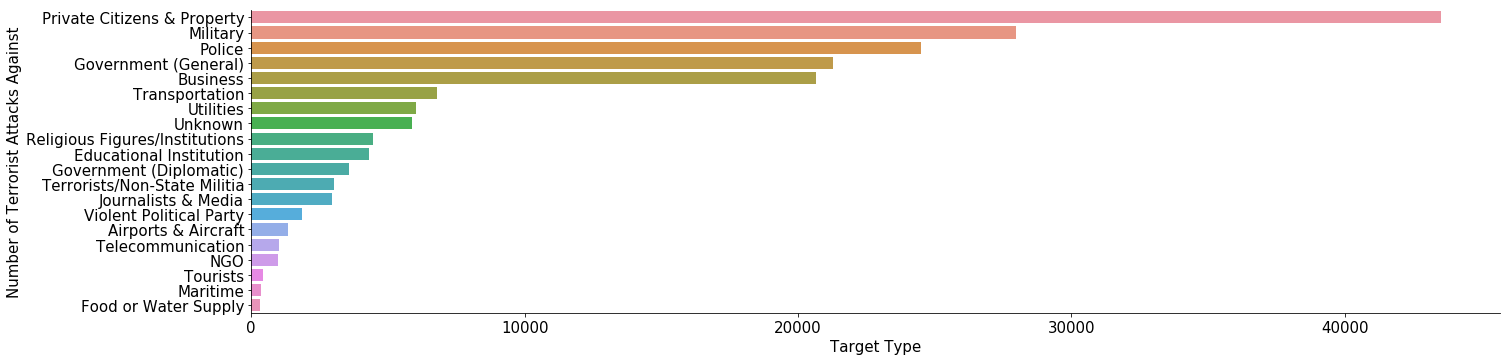

In [56]:
sns.catplot(x='targtype1_txt', y='targets', kind='bar', data=target, aspect=4)
plt.xlabel('Number of Terrorist Attacks Against', fontsize=15)
plt.ylabel('Target Type', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [57]:
method = pd.DataFrame(data['attacktype1_txt'].value_counts()[:20])
print(method)
method['types'] = method.index
method.types

                                     attacktype1_txt
Bombing/Explosion                              88255
Armed Assault                                  42669
Assassination                                  19312
Hostage Taking (Kidnapping)                    11158
Facility/Infrastructure Attack                 10356
Unknown                                         7276
Unarmed Assault                                 1015
Hostage Taking (Barricade Incident)              991
Hijacking                                        659


Bombing/Explosion                                        Bombing/Explosion
Armed Assault                                                Armed Assault
Assassination                                                Assassination
Hostage Taking (Kidnapping)                    Hostage Taking (Kidnapping)
Facility/Infrastructure Attack              Facility/Infrastructure Attack
Unknown                                                            Unknown
Unarmed Assault                                            Unarmed Assault
Hostage Taking (Barricade Incident)    Hostage Taking (Barricade Incident)
Hijacking                                                        Hijacking
Name: types, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text yticklabel objects>)

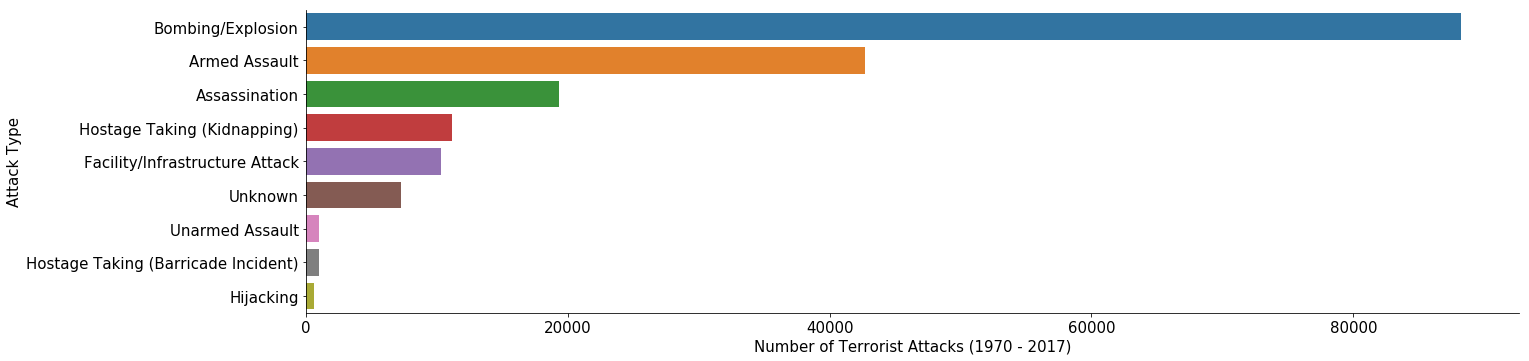

In [65]:
sns.catplot(x='attacktype1_txt', y='types', kind='bar', data=method, aspect=4)
plt.xlabel('Number of Terrorist Attacks (1970 - 2017)', fontsize=15)
plt.ylabel('Attack Type', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [59]:
years = pd.DataFrame(data['iyear'].value_counts()[:20])
print(years)
years['year_number'] = years.index
years.year_number

      iyear
2014  16903
2015  14965
2016  13587
2013  12036
2017  10900
2012   8522
2011   5076
1992   5071
2010   4826
2008   4805
2009   4721
1991   4683
1989   4324
1990   3887
1988   3721
1984   3495
1994   3456
2007   3242
1997   3197
1987   3183


2014    2014
2015    2015
2016    2016
2013    2013
2017    2017
2012    2012
2011    2011
1992    1992
2010    2010
2008    2008
2009    2009
1991    1991
1989    1989
1990    1990
1988    1988
1984    1984
1994    1994
2007    2007
1997    1997
1987    1987
Name: year_number, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text yticklabel objects>)

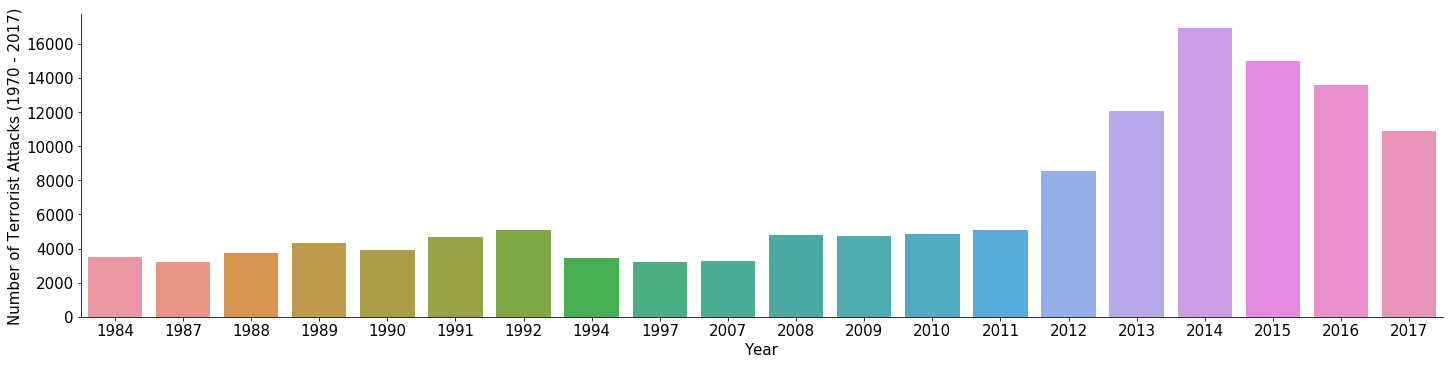

In [60]:
sns.catplot(x='year_number', y='iyear', kind='bar', data=years, aspect=4)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Terrorist Attacks (1970 - 2017)', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [61]:
m = data[['latitude','longitude']].iloc[:15]
m

latitude   longitude
0   18.456792  -69.951164
1   19.371887  -99.086624
2   15.478598  120.599741
3   37.997490   23.762728
4   33.580412  130.396361
5   37.005105  -89.176269
6  -34.891151  -56.187214
7   37.791927 -122.225906
8   43.076592  -89.412488
9   43.072950  -89.386694
10  43.468500  -89.744299
11  39.758968 -104.876305
12  41.890961   12.490069
13  42.331685  -83.047924
14  18.386932  -66.061127

In [62]:
terrorism_map = folium.Map(location=[0,0], 
                      tiles = 'Stamen Toner',
                      zoom_start = 1.5)

# Add data for heatmap for years 1970 - 1994
print(len(data))
data_heatmap = data[:55000]
data_heatmap = data_heatmap[['latitude','longitude']]
data_heatmap = data_heatmap.dropna(axis=0, subset=['latitude','longitude'])
data_heatmap = [[row['latitude'],row['longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(terrorism_map)

# Plot!
terrorism_map

181691


In [63]:
terrorism_map = folium.Map(location=[0,0], 
                      tiles = 'Stamen Toner',
                      zoom_start = 1.5)

# Add data for heatmap for years 1994 - 2012
data_heatmap = data[55000:110000]
data_heatmap = data_heatmap[['latitude','longitude']]
data_heatmap = data_heatmap.dropna(axis=0, subset=['latitude','longitude'])
data_heatmap = [[row['latitude'],row['longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(terrorism_map)

# Plot!
terrorism_map

In [64]:
terrorism_map = folium.Map(location=[0,0], 
                      tiles = 'Stamen Toner',
                      zoom_start = 1.5)

# Add data for heatmap for years 2012 - 2016
data_heatmap = data[110000:165000]
data_heatmap = data_heatmap[['latitude','longitude']]
data_heatmap = data_heatmap.dropna(axis=0, subset=['latitude','longitude'])
data_heatmap = [[row['latitude'],row['longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(terrorism_map)

# Plot!
terrorism_map